In [2]:
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [3]:
def cost(X, Y, m):
    totalCost = 0
    N = len(X[:, 0])
    for i in range(N):
        totalCost += (Y[i] - (m*X[i]).sum())**2
        
    return totalCost/N

In [4]:
def stepGradient(x_train, y_train,alpha,m):
    m_slopes = np.zeros(len(m))
    N = x_train.shape[0]
    M = x_train.shape[1]
    
    #print(x_train[0])
    for i in range(N):
        for j in range(M):
            m_slopes[j] += (-2/N)*(y_train[i] - (m*x_train[i]).sum())*x_train[i][j]
    m = m - alpha*m_slopes
    return m 

In [5]:
def gradientDescent(X, Y, learningRate, n):
    m = np.zeros(len(X[0]))
    cst = []
    itr = []
    for i in range(n):
        m = stepGradient(X, Y, learningRate, m)
        c = cost(X, Y, m)
        cst.append(c)
        itr.append(i + 1)
        print("Cost ", i + 1, ":", c)
        
    return m, cst, itr

In [6]:
def predict(X, m):
    N = len(X[:, 0])
    print(N)
    Y = np.zeros(N)
    for i in range(N):
        Y[i] = (X[i] * m).sum()
        
    return Y

In [7]:
data = np.loadtxt("/Users/abhi99/Downloads/0000000000002417_training_boston_x_y_train.csv", delimiter = ',')
print(data.shape)
train = data.copy()
X = train[:,:-1]
Y = train[:,-1:]

print(X.shape)
#print(data[0])
#print(X[0])
#print(Y[0])

(379, 14)
(379, 13)


In [8]:
scaler = preprocessing.StandardScaler()
# scaler.fit(X)
# X_scaled = scaler.transform(X)
#print(X_scaled.mean(axis = 0))


Z = np.ones((len(X[:, 0]), len(X[0]) + 1))
Z[:,:-1] = X
X_scaled = Z
#print(Z.shape)
#print(X_scaled.shape)
#print(Z[0])
#print(X_scaled[0])

In [9]:
n = 100
learningRate = 0.13
m, cst, itr = gradientDescent(X_scaled, Y, learningRate, n)
print(m)

Cost  1 : [329.52072559]
Cost  2 : [188.422041]
Cost  3 : [113.6645619]
Cost  4 : [73.62718235]
Cost  5 : [51.968773]
Cost  6 : [40.13289573]
Cost  7 : [33.59043351]
Cost  8 : [29.92244547]
Cost  9 : [27.82727015]
Cost  10 : [26.59990051]
Cost  11 : [25.8562131]
Cost  12 : [25.38568196]
Cost  13 : [25.07218176]
Cost  14 : [24.8511649]
Cost  15 : [24.6863972]
Cost  16 : [24.55726687]
Cost  17 : [24.45183463]
Cost  18 : [24.36301323]
Cost  19 : [24.28645824]
Cost  20 : [24.21939796]
Cost  21 : [24.15997993]
Cost  22 : [24.10690304]
Cost  23 : [24.05920787]
Cost  24 : [24.01615546]
Cost  25 : [23.97715556]
Cost  26 : [23.94172317]
Cost  27 : [23.90945107]
Cost  28 : [23.87999199]
Cost  29 : [23.85304631]
Cost  30 : [23.82835335]
Cost  31 : [23.80568482]
Cost  32 : [23.78483984]
Cost  33 : [23.7656409]
Cost  34 : [23.74793067]
Cost  35 : [23.73156925]
Cost  36 : [23.71643198]
Cost  37 : [23.70240751]
Cost  38 : [23.68939616]
Cost  39 : [23.67730856]
Cost  40 : [23.66606441]
Cost  41 : [23.

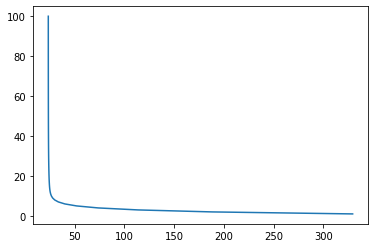

In [11]:
plt.plot(cst, itr)
plt.show()

In [12]:
N = len(X[:, 0])
M = len(X[0])
N, M
   

(379, 13)

379
(379,)
(379, 1)


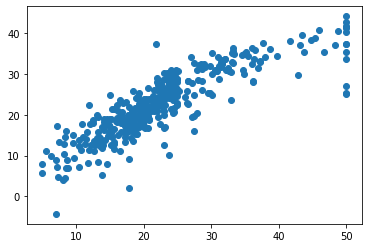

In [13]:
Y_train = predict(X_scaled, m)
print(Y_train.shape)
print(Y.shape)
plt.scatter(Y, Y_train)
plt.show()

In [14]:
X_test = np.loadtxt("/Users/abhi99/Downloads/0000000000002417_test_boston_x_test.csv", delimiter = ',')
scaler.fit(X_test)
X_test = scaler.transform(X_test)

Z = np.ones((len(X_test[:, 0]), len(X_test[0]) + 1))
Z[:,:-1] = X_test
X_test = Z

In [15]:
Y_test = predict(X_test, m)
np.savetxt("boston_ypredictfinal.csv", Y_test)

127


In [16]:
print(Y_test)

[11.37352548 28.68089803 22.50140034 24.00409186 20.7239099   2.13381462
 30.31187941 24.75041864 18.56805267 23.5053882  23.97933779 17.52043301
 17.02814756 21.40303818 43.25444887 23.51826551 24.26950396 27.70557233
 19.76544395 31.38539216 23.92817737 24.84879381 34.15317288 37.0951994
 31.67936455 16.2689735  23.43881247 33.05413699 25.47953454 34.43131587
 16.64924751 26.06030676 23.38850408 25.268909   14.16316475 29.74881191
 26.07989811 20.46057032 23.91094217  8.47868595  7.53011587 28.73736253
 29.17927255 19.7941871  20.10314842  2.09337596 39.79122131 25.68582139
 29.71286593 16.42130951 17.4907187  40.79593537 17.22297738 21.04419099
 15.29042082 21.19734162 18.16338104 23.10487429 13.31678528 16.86897797
 13.86900544 29.28791765 25.20857245 25.44399633 16.95659668 16.94579138
 34.86855427 16.66701222 27.52523292 22.33675126 29.44249852 27.02080181
 17.63638364  4.66311328 36.53796037 24.95521458 30.0134277  27.10682823
 15.62012896 32.20267963 19.2071726  22.82133867 22.

In [17]:
print(X_test)

[[ 3.88203164 -0.47968561  1.19321481 ... -1.72394297  1.14793924
   1.        ]
 [-0.4496825  -0.47968561  0.54572124 ...  0.41293844 -0.87954882
   1.        ]
 [-0.4624454  -0.47968561  0.23746473 ...  0.41293844 -0.46700418
   1.        ]
 ...
 [-0.45831967  2.09168571 -1.34873963 ...  0.36041572 -0.656393
   1.        ]
 [-0.4494016  -0.47968561 -0.28455761 ...  0.30708851  0.26852914
   1.        ]
 [-0.09779398 -0.47968561  1.42247091 ... -3.12998863  0.56949587
   1.        ]]


In [18]:
print(X_scaled)

[[-0.40784991 -0.48772236 -1.2660231  ...  0.41057102 -1.09799011
   1.        ]
 [-0.40737368 -0.48772236  0.24705682 ...  0.29116915 -0.52047412
   1.        ]
 [ 0.1251786  -0.48772236  1.01599907 ... -3.79579542  0.89107588
   1.        ]
 ...
 [-0.40831101 -0.48772236  0.24705682 ...  0.33206621 -0.33404299
   1.        ]
 [-0.41061997 -0.48772236 -1.15221381 ...  0.203235   -0.74475218
   1.        ]
 [ 0.34290895 -0.48772236  1.01599907 ...  0.38787479 -1.35871335
   1.        ]]
